# ESG Risk Score Prediction
EDA and Model Training Notebook

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib, os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import shap

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Load dataset
data_path = "D:\projects\ESG-Risk-Scoring-System\src\data\merged_data.csv"
df = pd.read_csv(data_path)

# Parse date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.shape, df.head()

((220, 19),
   company sector  carbon_emissions  diversity_ratio  governance_score  \
 0    AAPL   Tech         2300000.0             0.31              88.5   
 1    AAPL   Tech         2300000.0             0.31              88.5   
 2    AAPL   Tech         2300000.0             0.31              88.5   
 3    AAPL   Tech         2300000.0             0.31              88.5   
 4    AAPL   Tech         2300000.0             0.31              88.5   
 
    risk_score       date  close_price  volatility  debt_to_equity  \
 0   55.919509 2020-03-31       154.63       0.018            0.92   
 1   71.970569 2020-06-30       154.63       0.012            0.93   
 2   78.194591 2020-09-30       154.63       0.018            0.92   
 3   31.004271 2020-12-31       154.63       0.018            0.92   
 4   37.473748 2021-03-31       156.32       0.018            1.23   
 
    portfolio_weight  investment_value region  carbon_tax_rate  \
 0          0.129944      1.299443e+06     US         

## Exploratory Data Analysis

Shape: (220, 19)
Columns: ['company', 'sector', 'carbon_emissions', 'diversity_ratio', 'governance_score', 'risk_score', 'date', 'close_price', 'volatility', 'debt_to_equity', 'portfolio_weight', 'investment_value', 'region', 'carbon_tax_rate', 'climate_risk_index', 'interest_rate', 'name', 'sentiment', 'keywords']
Nulls:
 company                 0
sector                  0
carbon_emissions        0
diversity_ratio         0
governance_score        0
risk_score              0
date                    0
close_price             0
volatility              0
debt_to_equity          0
portfolio_weight        0
investment_value        0
region                  0
carbon_tax_rate         0
climate_risk_index      0
interest_rate           0
name                    0
sentiment               0
keywords              220
dtype: int64


,company,sector,carbon_emissions,diversity_ratio,governance_score,risk_score,date,close_price,volatility,debt_to_equity,portfolio_weight,investment_value,region,carbon_tax_rate,climate_risk_index,interest_rate,name,sentiment,keywords
count,220,220,2.200000e+02,220.000000,220.000000,220.000000,220,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220,2.200000e+02,220.000000,220.000000,220,220.0,0.0
unique,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,10,NaN,NaN
top,AAPL,Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,Apple Inc.,NaN,NaN
freq,22,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220,NaN,NaN,NaN,22,NaN,NaN
mean,NaN,NaN,2.542727e+06,0.426273,83.711818,51.818865,2022-11-14 17:27:16.363636480,396.193727,0.047505,1.022045,0.100000,1.000000e+06,NaN,6.000000e-02,0.238182,0.024545,NaN,0.0,NaN
min,NaN,NaN,2.300000e+06,0.280000,72.000000,20.650259,2020-03-31 00:00:00,33.720000,0.012000,0.450000,0.009877,9.876993e+04,NaN,6.000000e-02,0.230000,0.020000,NaN,0.0,NaN
25%,NaN,NaN,2.300000e+06,0.310000,78.000000,37.333133,2021-06-30 00:00:00,120.500000,0.018000,0.750000,0.056560,5.655981e+05,NaN,6.000000e-02,0.230000,0.025000,NaN,0.0,NaN
50%,NaN,NaN,2.500000e+06,0.315000,88.300000,52.186437,2022-11-15 00:00:00,128.600000,0.060000,1.230000,0.087481,8.748124e+05,NaN,6.000000e-02,0.230000,0.025000,NaN,0.0,NaN
75%,NaN,NaN,2.500000e+06,0.620000,88.500000,67.397252,2024-03-31 00:00:00,245.670000,0.060000,1.250000,0.129944,1.299443e+06,NaN,6.000000e-02,0.250000,0.025000,NaN,0.0,NaN
max,NaN,NaN,3.500000e+06,0.620000,88.500000,79.983060,2025-06-30 00:00:00,2200.560000,0.070000,1.350000,0.246737,2.467370e+06,NaN,6.000000e-02,0.250000,0.025000,NaN,0.0,NaN


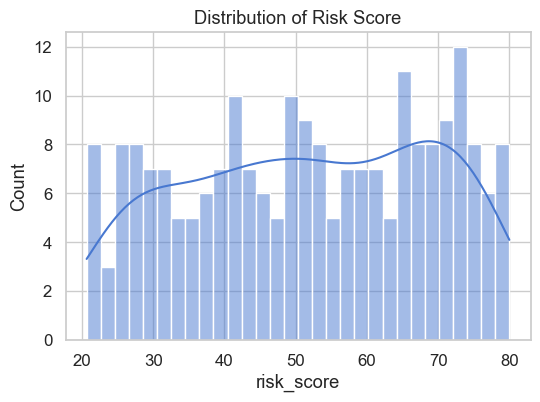

Date range: 2020-03-31 00:00:00 to 2025-06-30 00:00:00
Unique companies: 10
Unique sectors: 6


In [3]:

# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Nulls:\n", df.isna().sum())

# Summary statistics
display(df.describe(include="all"))

# Distribution of target
plt.figure(figsize=(6,4))
sns.histplot(df['risk_score'], bins=30, kde=True)
plt.title("Distribution of Risk Score")
plt.show()

# Time range
print("Date range:", df['date'].min(), "to", df['date'].max())

# Companies & sectors
print("Unique companies:", df['company'].nunique())
print("Unique sectors:", df['sector'].nunique())

## Feature Engineering

In [4]:

# New engineered features
df['log_carbon_emissions'] = np.log1p(df['carbon_emissions'])
df['log_investment_value'] = np.log1p(df['investment_value'])
df['log_close_price'] = np.log1p(df['close_price'])
df['carbon_cost_est'] = df['carbon_tax_rate'] * df['carbon_emissions']
df['vol_x_dte'] = df['volatility'] * df['debt_to_equity']
df['sentiment_missing'] = df['sentiment'].isna().astype(int)
df['keywords_len'] = df['keywords'].fillna("").apply(lambda x: len(str(x).split()))
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter

numeric_features = [
    'carbon_emissions','diversity_ratio','governance_score','sentiment',
    'volatility','carbon_tax_rate','climate_risk_index','interest_rate',
    'debt_to_equity','portfolio_weight','investment_value','close_price',
    'log_carbon_emissions','log_investment_value','log_close_price',
    'carbon_cost_est','vol_x_dte','sentiment_missing','keywords_len'
]
numeric_features = [c for c in numeric_features if c in df.columns]

categorical_features = ['sector','region','company']
categorical_features = [c for c in categorical_features if c in df.columns]

target_col = 'risk_score'

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['carbon_emissions', 'diversity_ratio', 'governance_score', 'sentiment', 'volatility', 'carbon_tax_rate', 'climate_risk_index', 'interest_rate', 'debt_to_equity', 'portfolio_weight', 'investment_value', 'close_price', 'log_carbon_emissions', 'log_investment_value', 'log_close_price', 'carbon_cost_est', 'vol_x_dte', 'sentiment_missing', 'keywords_len']
Categorical features: ['sector', 'region', 'company']


## Time & Company-aware Split

In [5]:

def time_grouped_split(df, test_size=0.2, val_size=0.1, company_col='company', date_col='date'):
    df = df.sort_values([company_col, date_col]).reset_index(drop=True)
    test_idx, val_idx, train_idx = [], [], []
    for comp, g in df.groupby(company_col):
        n = len(g)
        n_test = int(np.floor(n * test_size))
        n_val = int(np.floor(n * val_size))
        idxs = g.index.to_list()
        test_idx.extend(idxs[-n_test:] if n_test > 0 else [])
        val_idx.extend(idxs[-(n_test + n_val):-n_test] if n_val > 0 else [])
        train_idx.extend(idxs[: max(0, n - n_test - n_val)])
    return np.array(train_idx), np.array(val_idx), np.array(test_idx)

train_idx, val_idx, test_idx = time_grouped_split(df)
X = df[numeric_features + categorical_features]
y = df[target_col].values

X_train, X_val, X_test = X.iloc[train_idx], X.iloc[val_idx], X.iloc[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

print("Train/Val/Test sizes:", len(train_idx), len(val_idx), len(test_idx))


Train/Val/Test sizes: 160 20 40


## Model Training and Comparison

In [7]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median"))])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

models = [
    ("Ridge", Ridge(alpha=1.0, random_state=42)),
    ("RandomForest", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)),
    ("HGB", HistGradientBoostingRegressor(learning_rate=0.05, random_state=42))
]

results = []
for name, model in models:
    pipe = Pipeline([("prep", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    preds_val = pipe.predict(X_val)
    preds_test = pipe.predict(X_test)
    results.append({
        "model": name,
        "val_rmse": np.sqrt(mean_squared_error(y_val, preds_val)),
        "val_r2": r2_score(y_val, preds_val),
        "test_rmse": np.sqrt(mean_squared_error(y_test, preds_test)),
        "test_r2": r2_score(y_test, preds_test)
    })

# XGBoost with early stopping
preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

xgb = XGBRegressor(
    n_estimators=5000, learning_rate=0.02, max_depth=5,
    subsample=0.8, colsample_bytree=0.8,
    reg_lambda=2.0, min_child_weight=2,
    random_state=42, n_jobs=-1, tree_method="hist"
)
xgb.fit(X_train_prep, y_train, eval_set=[(X_val_prep, y_val)], verbose=False)

val_pred = xgb.predict(X_val_prep)
test_pred = xgb.predict(X_test_prep)
results.append({
    "model": "XGBoost",
    "val_rmse": np.sqrt(mean_squared_error(y_val, val_pred)),
    "val_r2": r2_score(y_val, val_pred),
    "test_rmse": np.sqrt(mean_squared_error(y_test, test_pred)),
    "test_r2": r2_score(y_test, test_pred)
})

results_df = pd.DataFrame(results).sort_values("val_rmse")
results_df


,model,val_rmse,val_r2,test_rmse,test_r2
0,Ridge,18.892637,-0.166055,20.437186,-0.520043
2,HGB,19.054171,-0.186080,20.398798,-0.514338
1,RandomForest,20.312049,-0.347850,21.622431,-0.701464
3,XGBoost,21.609229,-0.525501,22.516212,-0.845034


In [8]:
best_row = results_df.iloc[0]
best_model_name = best_row["model"]
print("Best model:", best_model_name)

Best model: Ridge


In [11]:
trval_idx = np.concatenate([train_idx, val_idx])
X_trval, y_trval = X.iloc[trval_idx], y[trval_idx]

if best_model_name == "XGBoost":
    preprocessor.fit(X_trval)
    X_trval_prep = preprocessor.transform(X_trval)
    X_test_prep = preprocessor.transform(X_test)

    xgb_final = XGBRegressor(**xgb.get_params())
    xgb_final.fit(
        X_trval_prep, y_trval,
        eval_set=[(X_test_prep, y_test)],
        early_stopping_rounds=200,
        verbose=False
    )
    final_model = Pipeline([("prep", preprocessor), ("model", xgb_final)])
else:
    model_lookup = {
        "Ridge": Ridge(alpha=1.0, random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
        "HGB": HistGradientBoostingRegressor(learning_rate=0.05, random_state=42),
    }
    final_model = Pipeline([("prep", preprocessor), ("model", model_lookup[best_model_name])])
    final_model.fit(X_trval, y_trval)
joblib.dump(final_model, "D:\projects\ESG-Risk-Scoring-System\models\esg_risk_model.pkl")

['D:\\projects\\ESG-Risk-Scoring-System\\models\\esg_risk_model.pkl']

## SHAP Explainability (for XGBoost)

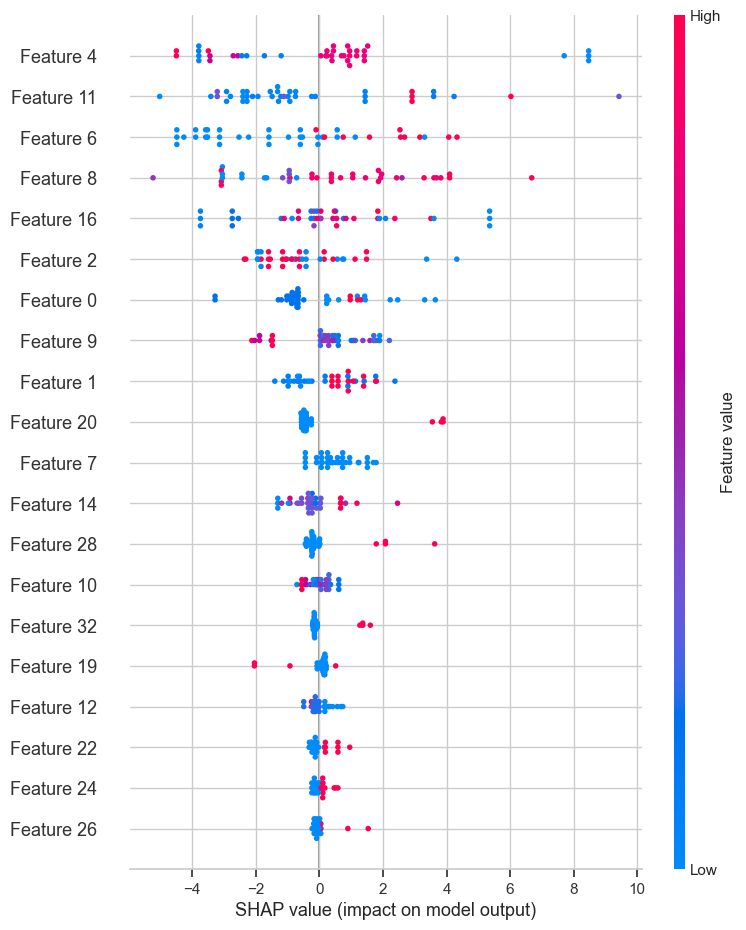

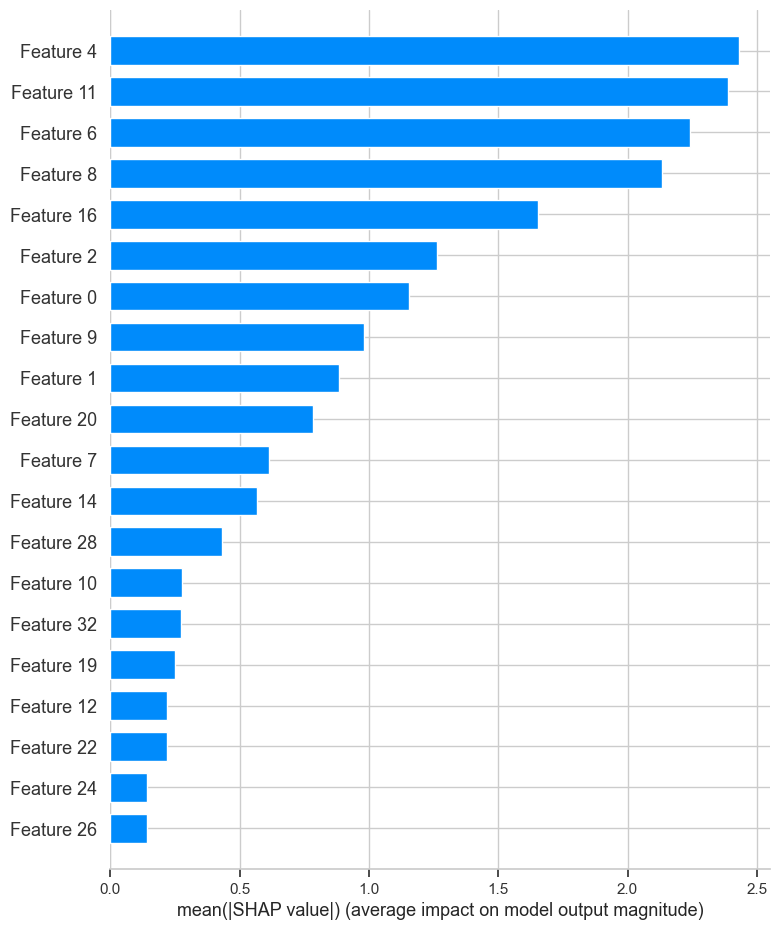

In [ ]:

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_prep)

plt.figure()
shap.summary_plot(shap_values, X_test_prep, show=False)
plt.show()

plt.figure()
shap.summary_plot(shap_values, X_test_prep, plot_type="bar", show=False)
plt.show()
